<a href="https://colab.research.google.com/github/javier-jaime/House_Move/blob/main/Moving_Truck_Optimization_with_RectPack_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Moving Truck Optimization

This demo is to show the use of the ReckPack library for a typical 2D knapsack problem: "Moving Truck Optimization".

Dimensions are from a typical U-Haul rental truck (excluding Mom's Attic).

### Install necessary Libraries




In [1]:
!pip install rectpack # Uncomment to install

In [2]:
from google.colab import drive
from google.colab import files

# Mount Google Drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Trucks Dimensions

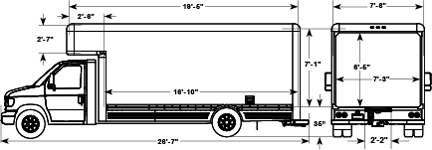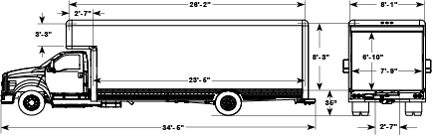

In [3]:
# Truck Interior Size (inches)

bx = 0 # Buffer x
by = 0 # Buffer y

truck20 = [(87 - bx, 202 - by)]
truck26 = [(92 - bx, 282 - by)]

truck20x2 = [(87 - bx, 202 - by),(87 - bx, 202 - by)]
truck26x2 = [(92 - bx, 282 - by),(92 - bx, 282 - by)]

### Furniture List & Dimensions

In [4]:
# Furniture Dimensions
dresser = [16.5, 60]
q_bed_1 = [64, 83]
# q_bed_2 = [66, 95]
q_bed_2 = [38, 95] # Flipped
t_bed_1 = [42, 77]
t_bed_2 = [42, 77]
couch_1 = [38, 35]
couch_2 = [38, 59]
couch_3 = [38, 80]
couch_4 = [38, 87]
table = [35.3, 53]
s_bike = [22, 50]
stepper = [28, 35]

# Furniture List

list = [dresser, q_bed_1, q_bed_2, t_bed_1, t_bed_2, couch_1, couch_2, couch_3, couch_4, table, s_bike, stepper]

### Optimization Model Helper functions

In [5]:
# Import the Helper Functions
!cp drive/MyDrive/Colab_Functions/RectPack_Functions.py "/content/"
from RectPack_Functions import *

### Test 1: 20ft Truck (not stacked)

0
4 out of 12 pieces of furniture fit in the truck
Furniture Dimensions:  [[38, 87], [64, 83], [38, 95], [42, 77]]


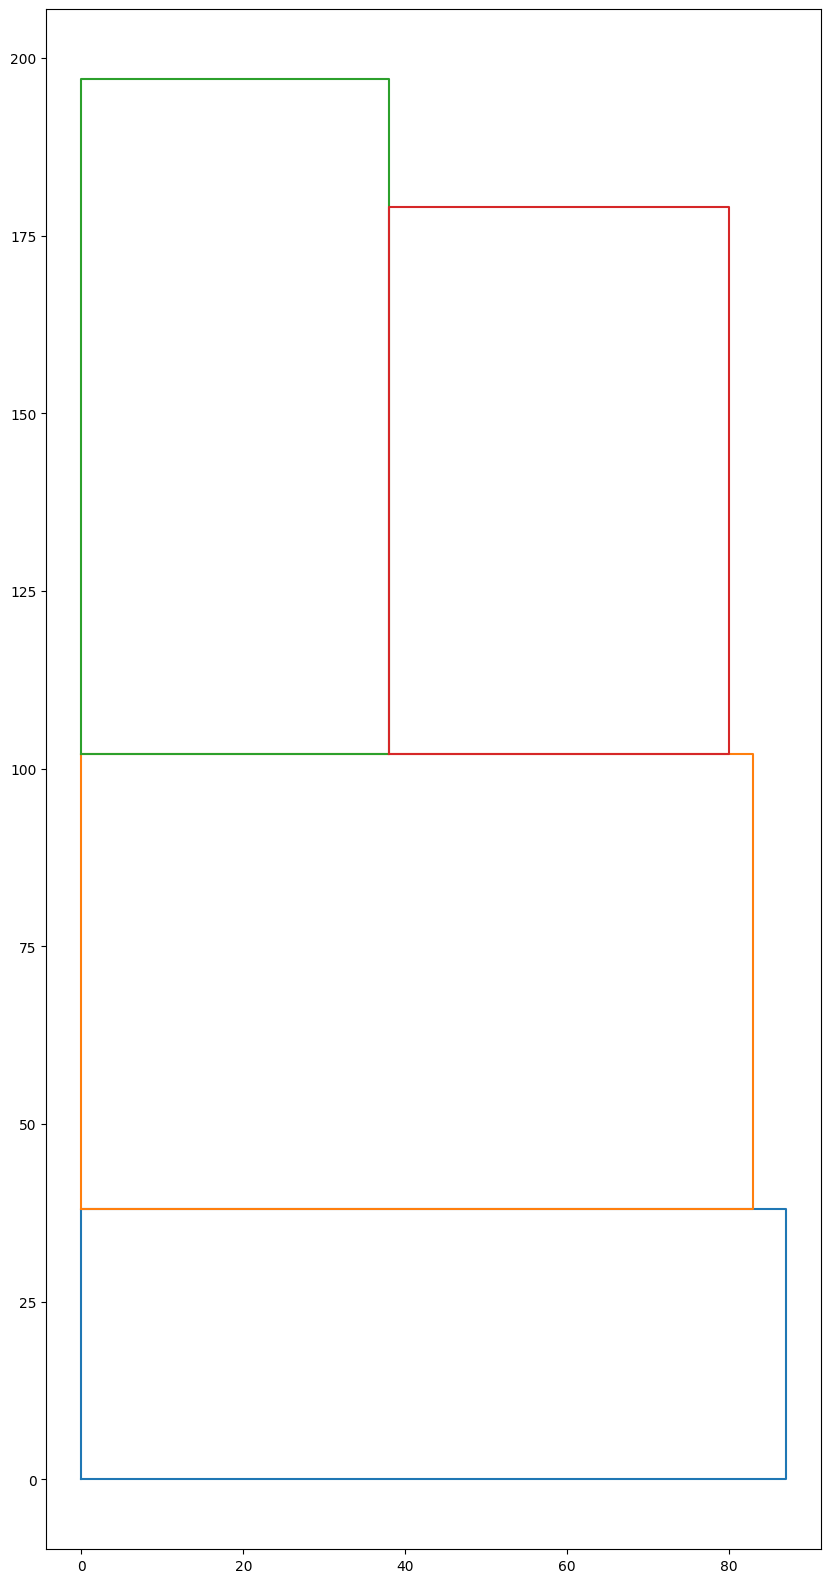

In [6]:
# Test 1 - 20 ft Truck Not Stacked

all_rects, all_furniture, nrect = solver(list, truck20)

# Count number of furniture

print( nrect, "out of", len(list), "pieces of furniture fit in the truck")

print("Furniture Dimensions: ", all_furniture)

plot_solution(all_rects)


### Test 2: 26ft Truck (not stacked)

0
8 out of 12 pieces of furniture fit in the truck
Furniture Dimensions (in): [[38, 87], [64, 83], [38, 80], [42, 77], [38, 95], [35.3, 53], [22, 50], [35, 38]]


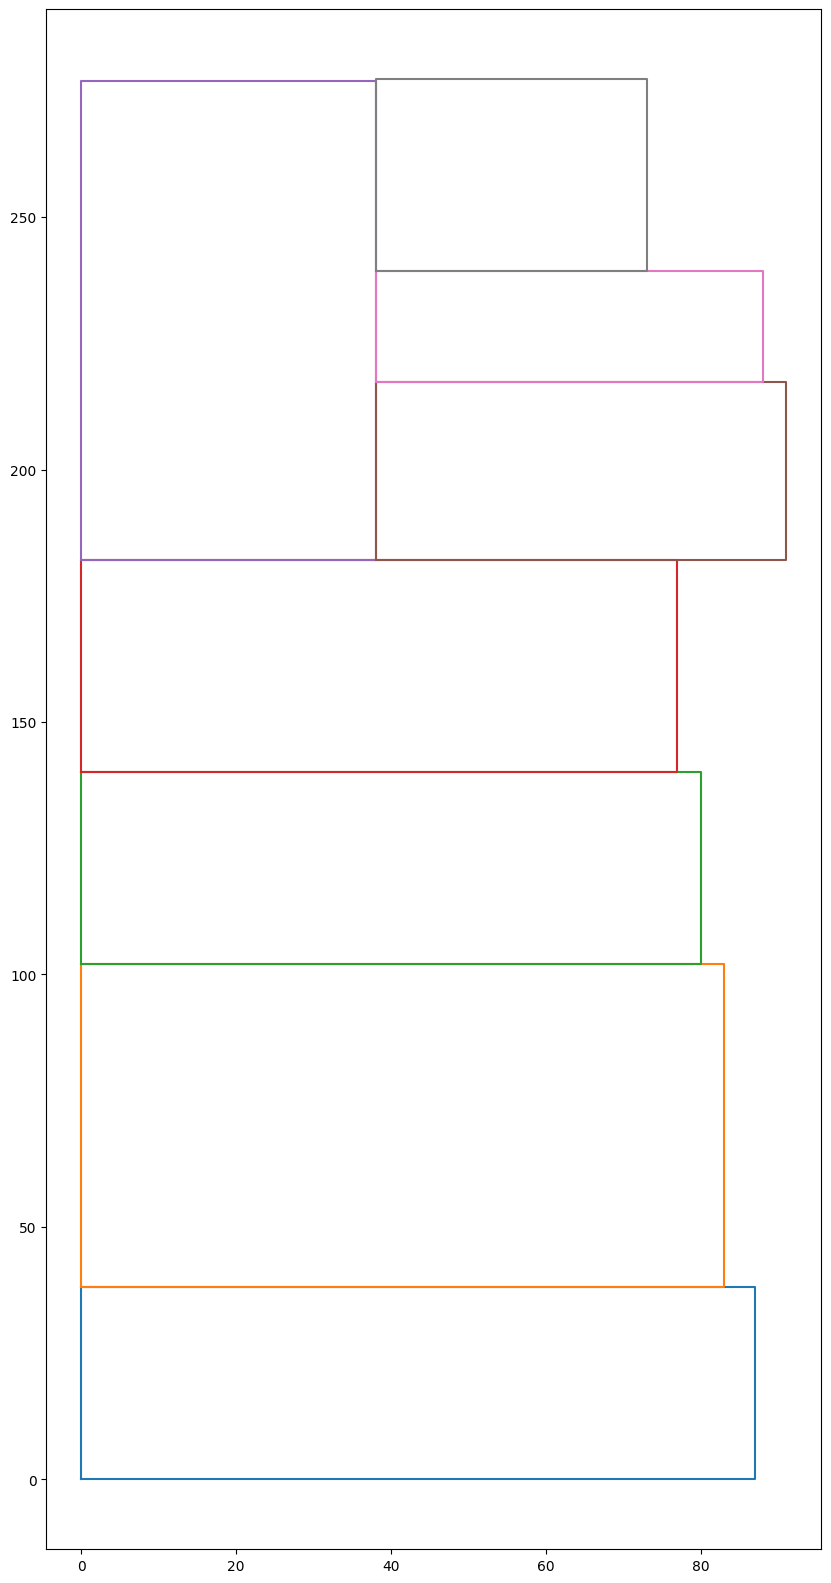

In [7]:
# Test 2 - 26 ft Truck

all_rects, all_furniture, nrect = solver(list, truck26)

# Count number of furniture

print( nrect, "out of", len(list), "pieces of furniture fit in the truck")

print("Furniture Dimensions (in):", all_furniture)

plot_solution(all_rects)


### Test 3: 2 rounds of 20ft Truck (not stacked)

---

0
4 out of 12 pieces of furniture fit in the truck
Furniture Dimensions:  [[38, 87], [64, 83], [38, 95], [42, 77]]


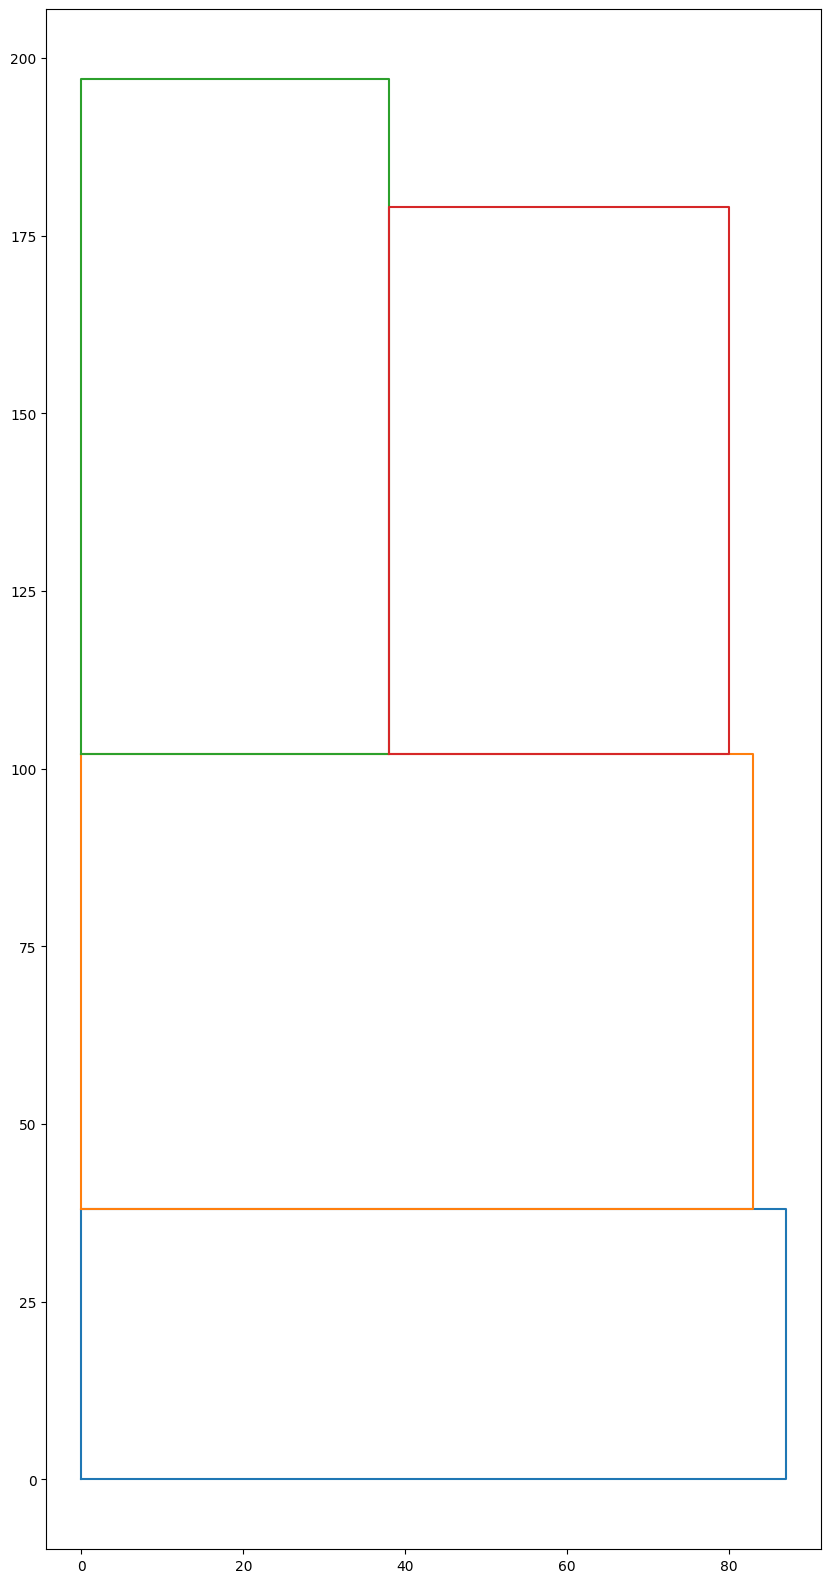

7 out of 12 pieces of furniture fit in the second round of the truck
Furniture Dimensions (in): [[38, 80], [42, 77], [16.5, 60], [22, 50], [38, 59], [28, 35], [35.3, 53]]


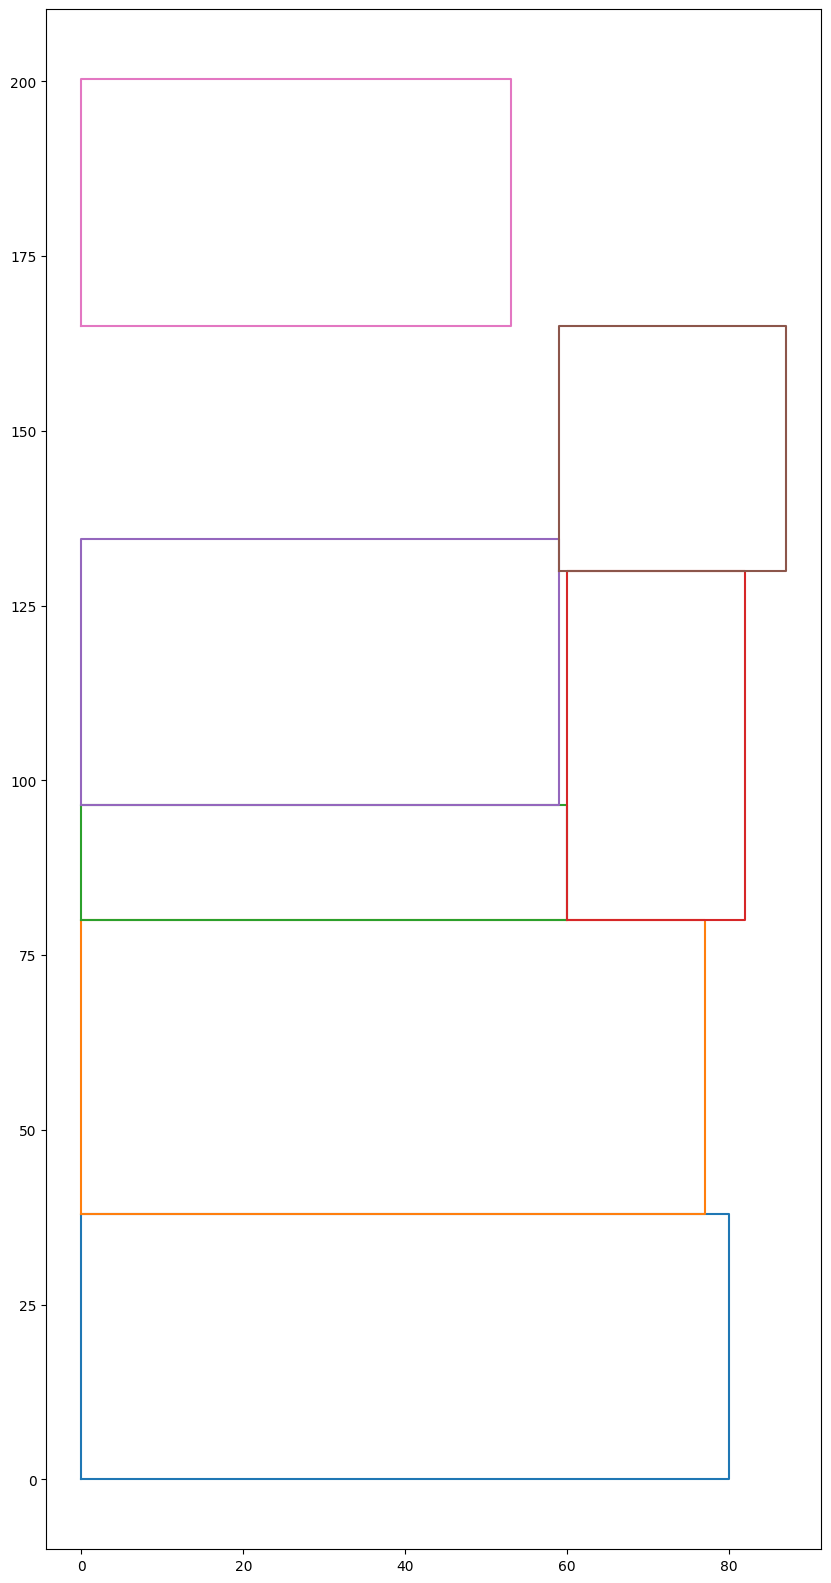

In [8]:
# Test 3 - 2 rounds of 20 ft Truck

all_rects, all_furniture, nrect = solver(list, truck20x2)

# Truck 1
print( nrect, "out of", len(list), "pieces of furniture fit in the truck")

print("Furniture Dimensions: ", all_furniture[0:nrect])

plot_solution(all_rects[0:nrect])

# Truck 2
if len(all_furniture) > nrect:
  print( len(all_furniture) - nrect, "out of", len(list), "pieces of furniture fit in the second round of the truck")

  print("Furniture Dimensions (in):", all_furniture[nrect:])

  plot_solution(all_rects[nrect:])



### Test 4: 2 rounds of 26ft Truck (not stacked)

0
8 out of 12 pieces of furniture fit in the truck
Furniture Dimensions:  [[38, 87], [64, 83], [38, 80], [42, 77], [38, 95], [35.3, 53], [22, 50], [35, 38]]


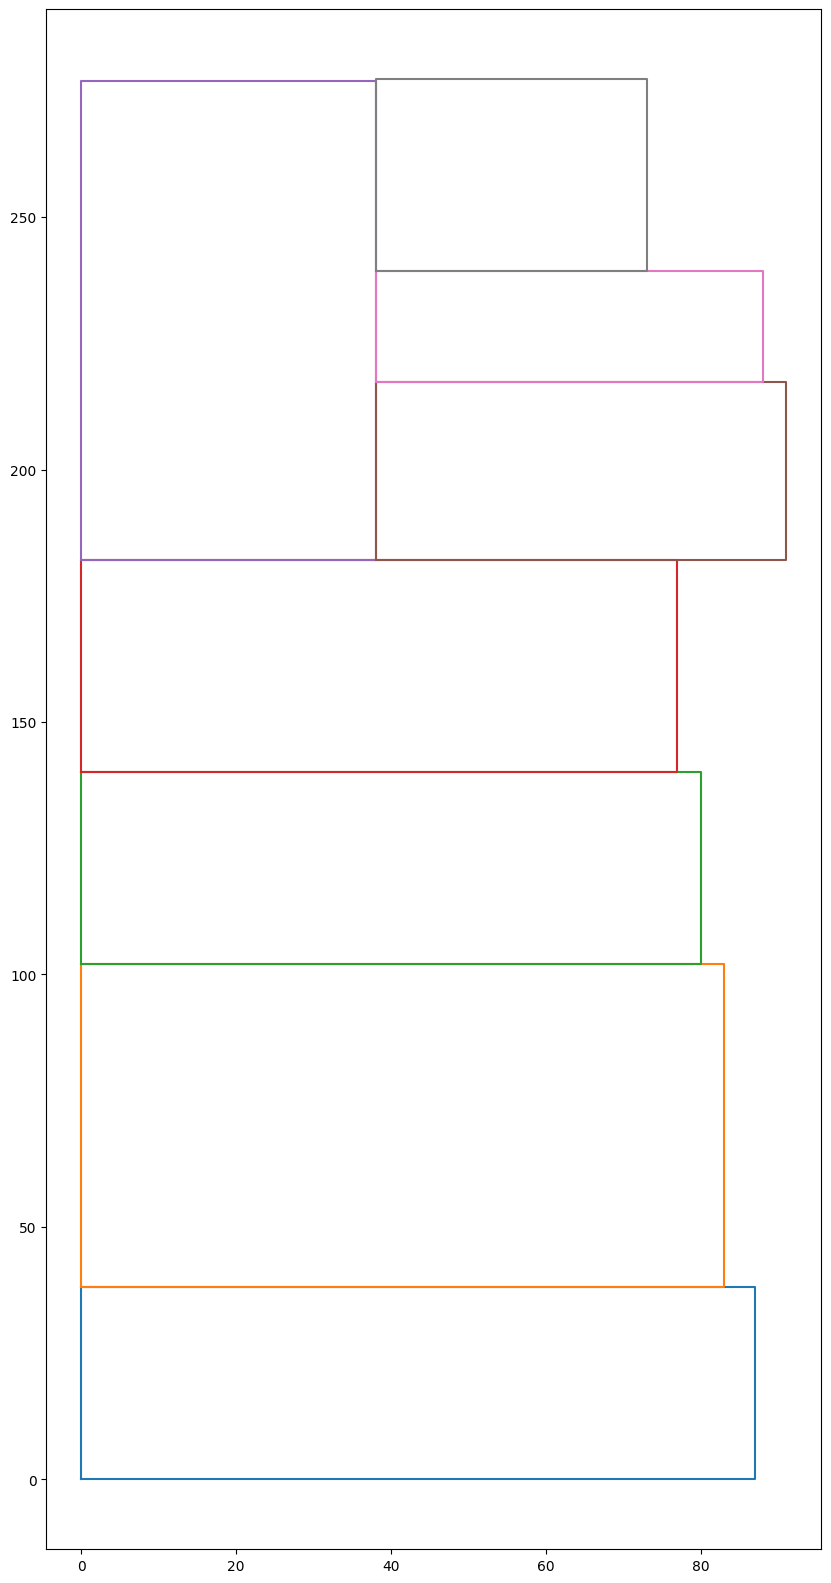

4 out of 12 pieces of furniture fit in the second round of the truck
Furniture Dimensions (in): [[42, 77], [16.5, 60], [28, 35], [38, 59]]


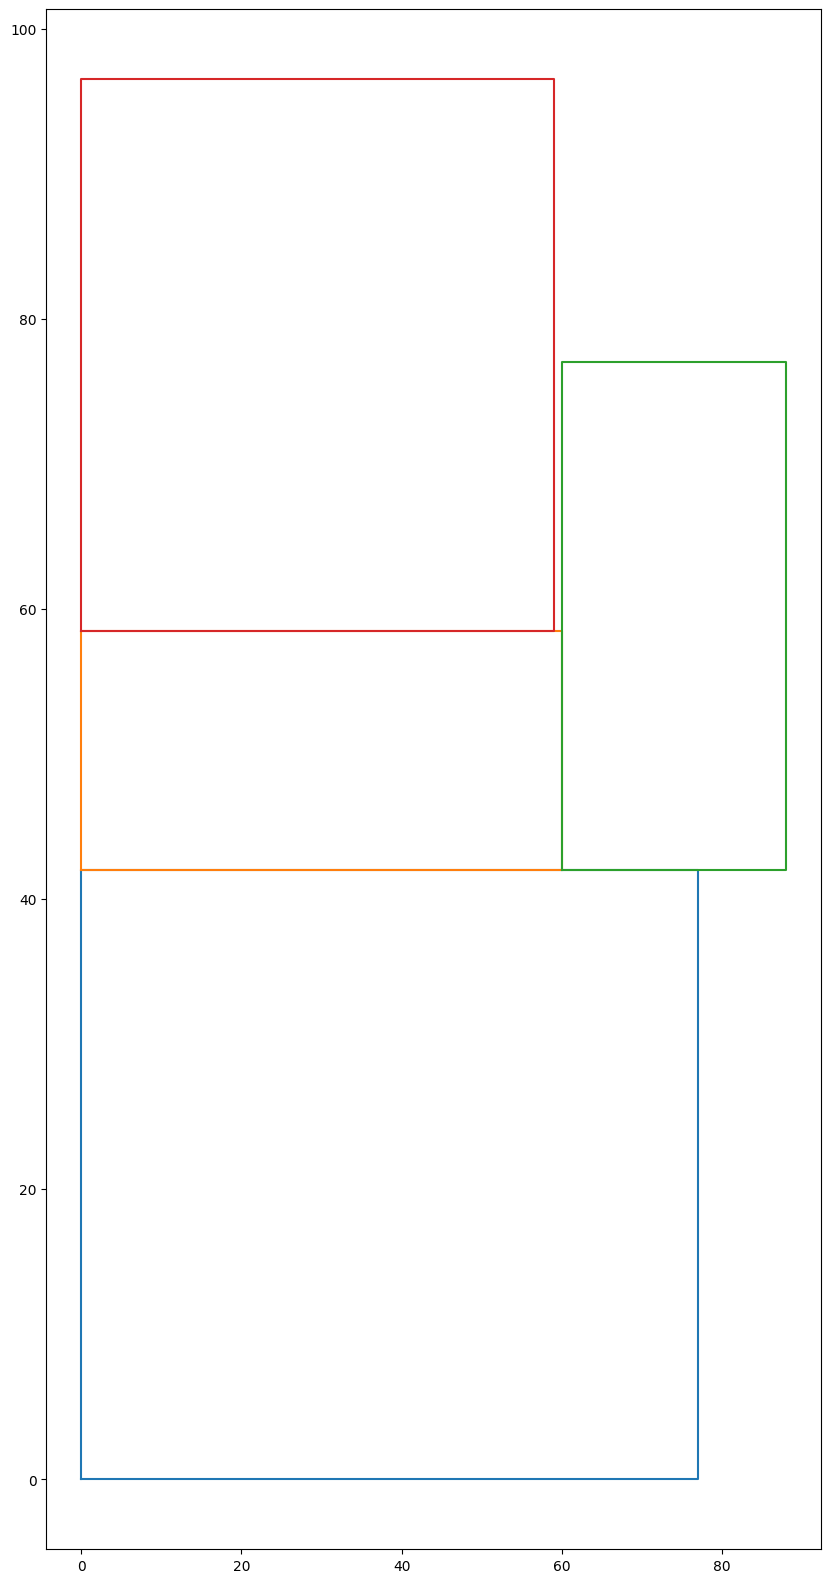

In [9]:
# Test 4 - 2 rounds of 26 ft Truck

all_rects, all_furniture, nrect = solver(list, truck26x2)

# Truck 1
print( nrect, "out of", len(list), "pieces of furniture fit in the truck")

print("Furniture Dimensions: ", all_furniture[0:nrect])

plot_solution(all_rects[0:nrect])

# Truck 2
if len(all_furniture) > nrect:
  print( len(all_furniture) - nrect, "out of", len(list), "pieces of furniture fit in the second round of the truck")

  print("Furniture Dimensions (in):", all_furniture[nrect:])

  plot_solution(all_rects[nrect:])

### Test 5: 26ft Truck Stacked

0
12 out of 12 pieces of furniture fit in the truck (stacked)
Furniture Dimensions:  [[38, 87], [64, 83], [38, 80], [42, 77], [38, 95], [35.3, 53], [22, 50], [35, 38], [42, 77], [16.5, 60], [28, 35], [38, 59]]


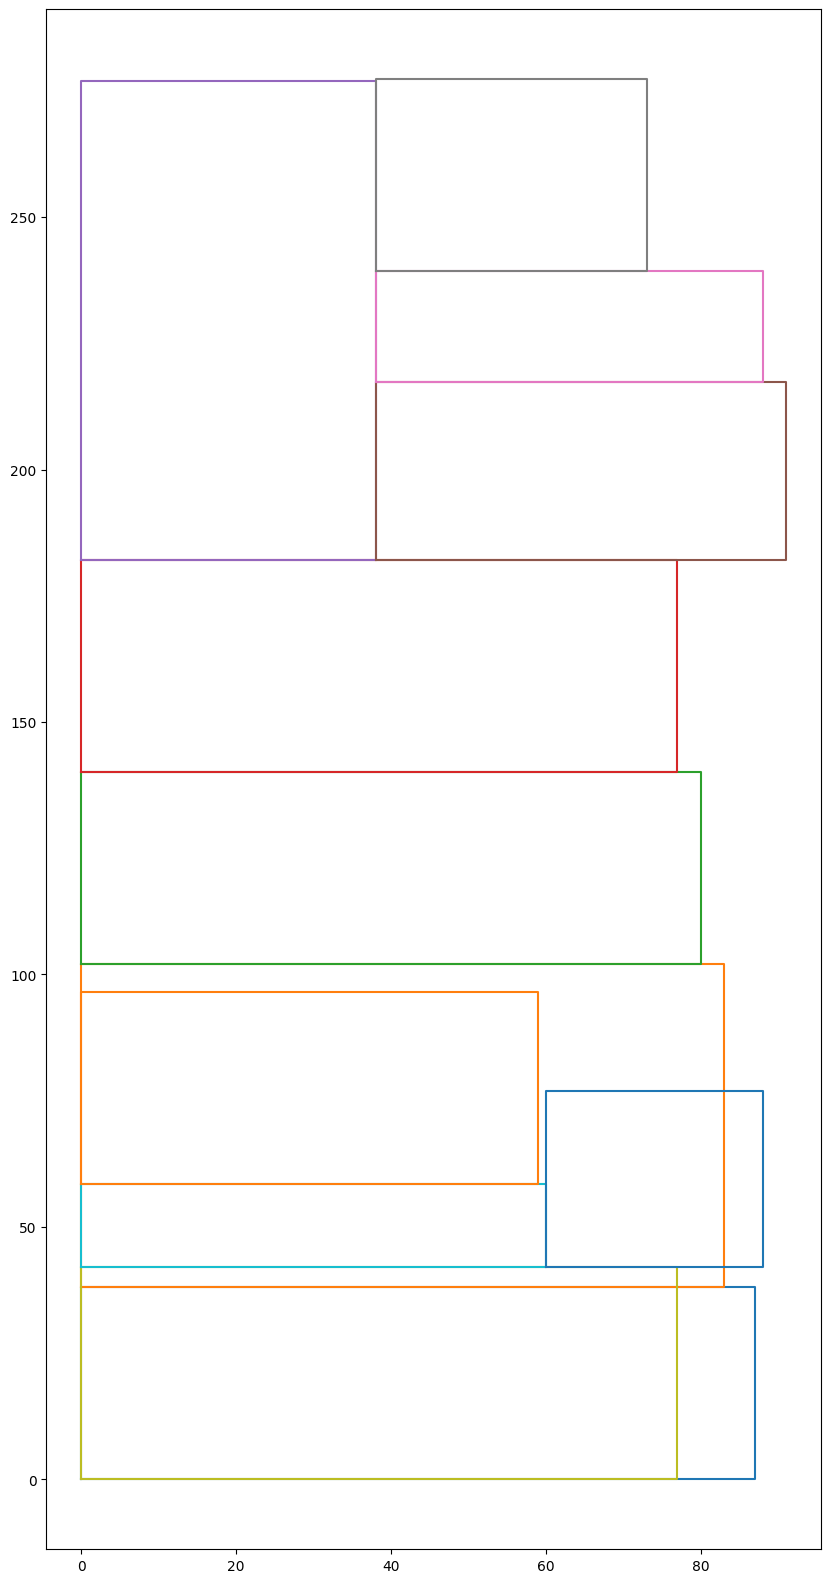

In [10]:
# Test 5 - 26 ft Truck (Stacked)

all_rects, all_furniture, nrect = solver(list, truck26x2)

# Truck 1 Stacked
print( len(all_furniture), "out of", len(list), "pieces of furniture fit in the truck (stacked)")

print("Furniture Dimensions: ", all_furniture)

plot_solution(all_rects)